In [68]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

5


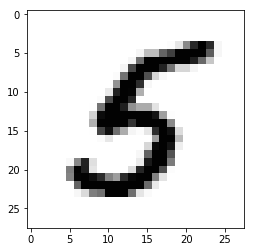

In [69]:
import matplotlib.pyplot as plt
image_index = 771 # You may select anything up to 60,000
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [70]:
x_train.shape

(60000, 28, 28)

In [71]:
x_train[image_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   6,  47, 140, 221, 255, 220,  19,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  20,  94,  94, 172, 204, 253, 253, 253, 253, 181,  19,   0,
          0,   0],
       [  

In [72]:
def calculateDensity(Iteration, density):
    N=28
    probMatrix=[]
    countMatrix=[]
    for z in range(10):
        matrix=[[0 for x in range(N)] for y in range(N)]
        probMatrix.append(matrix)
        countMatrix.append(0)

    for i in range(Iteration):
        img=x_train[i]
        number=y_train[i]
        matrix=probMatrix[number]
        countMatrix[number]+=1
        for x in range(28):
            for y in range(28):
                if img[x][y]>=density:
                    matrix[x][y]+=1
                
    for i in range(10):
        matrix=probMatrix[i]
        for x in range(28):
            for y in range(28):
                matrix[x][y]/=countMatrix[i]
    
    return probMatrix

In [82]:
import numpy as np

def calculateNumber(exImg, densityMatrix, density):
    finalProb=[]
    for i in range(10):
        matrix=densityMatrix[i]
        resultMatrix=[]
        for x in range(28):
            for y in range(28):
                if exImg[x][y]>=density:
                    resultMatrix.append(matrix[x][y])
                else:
                    resultMatrix.append(1-matrix[x][y])
        result=np.mean(resultMatrix)
        finalProb.append(result)
    
    return np.argmax(finalProb)

Predicted results:  2
Value: 2


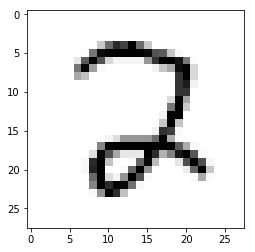

In [100]:
from random import randint

Iteration=100
Density=45

densityMatrix= calculateDensity(Iteration, Density)
tmpInt=randint(0,55000)
exImg = x_train[tmpInt]
results=calculateNumber(exImg, densityMatrix, Density)
#predictedNumber=calculateNumber(exImg, densityMatrix)
print("Predicted results: ", results)
print("Value:" , y_train[tmpInt])
plt.imshow(x_train[tmpInt], cmap='Greys')